# Modelo VEC vs Modelo MCO

In [74]:
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.vecm import VECM, select_order
from statsmodels.tools.eval_measures import rmse
import matplotlib.pyplot as plt
from Codigo import *
import seaborn as sn
from statsmodels.stats.diagnostic import normal_ad
sn.set(style="whitegrid")

- Este modelo intenta estimar los datos de el credito al sector privado a traves del nivel de ahorro interno bruto y las reservas legales, obviamente estos dos valores tienen cierto sentido entre ellos y de igual forma afectan al nivel de crédito en la economia.
    - El aumento de los recursos destinandos al prestamo reduciria las tasas de interes aumentando su demanda tanto en el sector de consumo como en el productivo.

## Cargar Datos

In [75]:
Datos = Tachos('../Alemania_Reducida.csv')

In [76]:
Columnas(Datos,'Desempleo, total')
Columnas(Datos,'capital')
Columnas(Datos,'PIB ')

Desempleo, total de jóvenes (% de la población activa total entre 15 y 24 años de edad) (estimación modelado OIT)
Desempleo, total de jóvenes (% del total de participación en la fuerza laboral de 15 a 24 años) (estimación nacional)
Desempleo, total (% de participación total en la fuerza laboral) (estimación nacional)
Desempleo, total (% de la población activa total) (estimación modelado OIT)
Ahorro ajustado: consumo de capital fijo (US$ actuales)
Formación bruta de capital (% del crecimiento anual)
Formación bruta de capital fijo (UMN a precios constantes)
Formación bruta de capital fijo (US$ a precios actuales)
Inversiones de cartera, entrada neta de capital (balanza de pagos, US$ a precios actuales)
Formación bruta de capital (US$ a precios constantes de 2010)
Formación bruta de capital fijo (% del crecimiento anual)
Formación bruta de capital fijo, sector privado (% del PIB)
Formación bruta de capital (UMN a precios actuales)
Formación bruta de capital fijo (US$ a precios constantes

In [77]:
data = Datos.copy()
data = data[['PIB (US$ a precios constantes de 2010)','Formación bruta de capital (US$ a precios constantes de 2010)','Desempleo, total (% de participación total en la fuerza laboral) (estimación nacional)']]
data.columns = ['PIB','capital','desempleo']
data.dropna(axis = 0, inplace = True)
print(data.head(10))


                     PIB       capital  desempleo
fecha                                            
1983-12-31  1.892372e+12  4.179429e+11       6.45
1984-12-30  1.945792e+12  4.247873e+11       6.67
1985-12-31  1.991089e+12  4.238624e+11       6.88
1986-12-31  2.036632e+12  4.480337e+11       6.61
1987-12-31  2.065189e+12  4.530900e+11       6.81
1988-12-30  2.141750e+12  4.901487e+11       6.32
1989-12-31  2.225205e+12  5.312154e+11       5.70
1990-12-31  2.342139e+12  5.771533e+11       4.89
1991-12-31  2.461782e+12  6.166168e+11       5.32
1992-12-30  2.509124e+12  6.178763e+11       6.32


In [78]:
data.index = pd.date_range(start = '1983-12-31', periods= len(data), freq = 'Y')

In [79]:
data['empleo'] = 100 - data['desempleo']
data = data[['PIB','empleo','capital']]

### Analisis de Estacionariedad a las Variables

In [80]:
DFuller(datos = data['empleo'])
print('---------------------------')
DFuller(data['capital'])
print('---------------------------')
DFuller(data['PIB'])
print('===========================')
print('     RESULTADO       ')
print('===========================')
print('Los resultados indican que los valores no son estacionarios en ninguno de los 3 casos dando valores altisimos')


Estadístico ADF: -0.6435344099855937
Valor p: 0.860838559324253
No podemos rechazar la hipótesis nula; la serie no es estacionaria.
---------------------------
Estadístico ADF: -1.7166425525157891
Valor p: 0.4225587745510112
No podemos rechazar la hipótesis nula; la serie no es estacionaria.
---------------------------
Estadístico ADF: -1.677106860077629
Valor p: 0.4429446263466269
No podemos rechazar la hipótesis nula; la serie no es estacionaria.
     RESULTADO       
Los resultados indican que los valores no son estacionarios en ninguno de los 3 casos dando valores altisimos


### Analisis de Cointegración

In [81]:
lag_order = select_order(data, maxlags= 10, deterministic= 'n', seasons= 0)

print(lag_order)
print('Selecionamos el que entre ellos tenga mas repetición y sea el menor por parsimonia')

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 10, BIC -> 10, FPE -> 9, HQIC ->  10>
Selecionamos el que entre ellos tenga mas repetición y sea el menor por parsimonia


In [82]:
print('Al 99% de confianza')
Johansen_Test(data,0,2,1)

Al 99% de confianza
Matriz de Valores Criticos vs Maximo Valor Propio
            cvm     eigv        Hipotesis
r = 0     12.2971    19.6776    Se rechaza r = 0, existe mas de 0 relación/nes de cointegración
r = 1     14.2639    7.9859    No hay suficiente evidencia para rechazar la hipótesis nula de r = 1.
r = 2     18.52    2.1864    No hay suficiente evidencia para rechazar la hipótesis nula de r = 2.
Tabla de Valores Criticos vs Traza Estadistica
            cvt     TS          Hipotesis
r = 0     13.4294    29.8499    Se rechaza r = 0, existe mas de 0 relación/nes de cointegración
r = 1     15.4943    10.1723    No hay suficiente evidencia para rechazar la hipótesis nula de r = 1.
r = 2     19.9349    2.1864    No hay suficiente evidencia para rechazar la hipótesis nula de r = 2.


## Modelo Inicial VEC

Para seleccionar el orden el sistema nos dice que para aic y hqic es 10 por lo que usaremos ese 

In [83]:
model = VECM(data ,coint_rank= 1, k_ar_diff= 3, deterministic= 'n')
result = model.fit()
alpha_matrix = result.alpha
print("Matriz de Coeficientes de Corrección de Errores (alpha):")
print(alpha_matrix)


Matriz de Coeficientes de Corrección de Errores (alpha):
[[-9.73562227e-02]
 [-2.28386829e-13]
 [-1.42786688e-02]]


In [84]:
print(result.summary())

Det. terms outside the coint. relation & lagged endog. parameters for equation PIB
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.PIB        -0.1487      0.302     -0.492      0.623      -0.741       0.444
L1.empleo   1.996e+10    2.2e+10      0.908      0.364   -2.31e+10    6.31e+10
L1.capital    -0.1539      0.544     -0.283      0.777      -1.220       0.912
L2.PIB         0.1198      0.315      0.381      0.703      -0.497       0.737
L2.empleo   1.507e+09   2.69e+10      0.056      0.955   -5.12e+10    5.42e+10
L2.capital    -1.0093      0.551     -1.833      0.067      -2.089       0.070
L3.PIB        -0.2140      0.399     -0.536      0.592      -0.996       0.568
L3.empleo  -7.088e+09   1.98e+10     -0.358      0.721   -4.59e+10    3.18e+10
L3.capital    -0.0467      0.594     -0.079      0.937      -1.211       1.117
Det. terms outside the coint. relation & lagged 

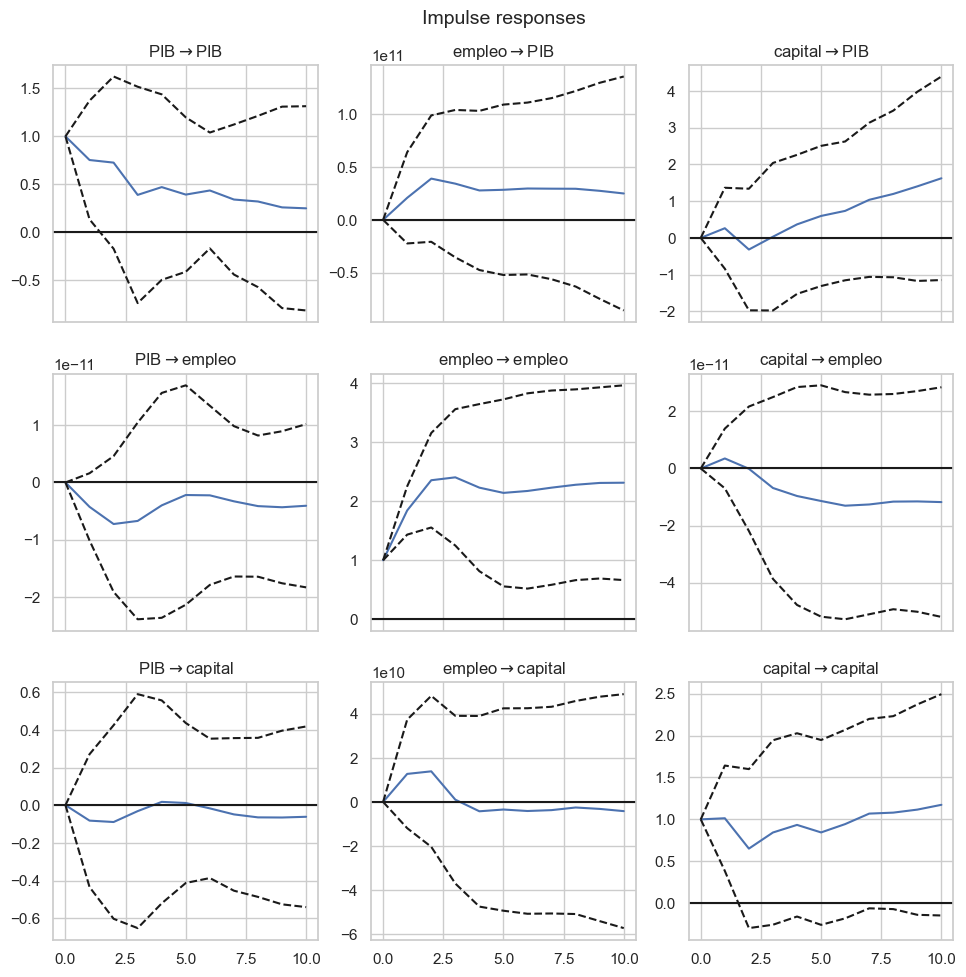

In [85]:
# Paso 6: Análisis de Impulsos-Respuestas
irf = result.irf(periods=10)
irf.plot()
plt.show()

Todos a largo plazo parecen tender al 0 lo que explica que el modelo esta cumpliendo sus propios condicionamientos y no revela un comportamiento caótico, esto es una buena señal de que los parámetros establecidos han sido los adecuados.

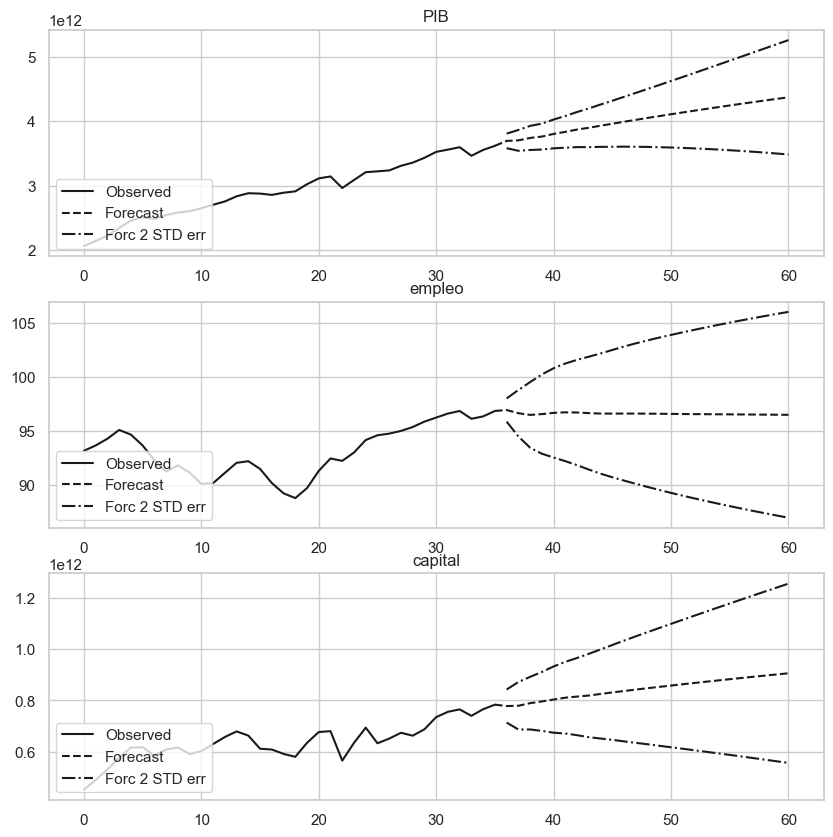

In [86]:
result.plot_forecast(steps = 25)

A pesar de eso la predicción del comportamiento de las reservas y el ahorro interno bruto parecen poco realistas para los proximos años creo que seria bueno agregar otras variables de coyuntura política. Fuera de eso en los primeros 10 años parece tener un comportamiento ciclico que seria interesante revisar

In [87]:
steps = 25
forecast, lower, upper = result.predict(steps, 0.05)
Fecha = pd.date_range(start=data.index[-1], periods=steps, freq='Y')

In [88]:
import statsmodels.api as sm

y = forecast[:,1]
x = forecast[:,2]

x = sm.add_constant(forecast[:,2])

modelo = sm.OLS(y,x).fit(cov_type= 'HC3')
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     6.164
Date:                Fri, 22 Dec 2023   Prob (F-statistic):             0.0208
Time:                        23:42:16   Log-Likelihood:                 31.245
No. Observations:                  25   AIC:                            -58.49
Df Residuals:                      23   BIC:                            -56.05
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.9591      0.561    174.625      0.0

array([96.71327261, 96.71143941, 96.69519813, 96.68452185, 96.67276057,
       96.66112005, 96.65416441, 96.64757748, 96.63786213, 96.62827991,
       96.61940205, 96.61045535, 96.60184456, 96.59373579, 96.58549929,
       96.57726301, 96.5692316 , 96.5613021 , 96.55343636, 96.54573439,
       96.53815667, 96.53067426, 96.52330722, 96.51605393, 96.50889496])

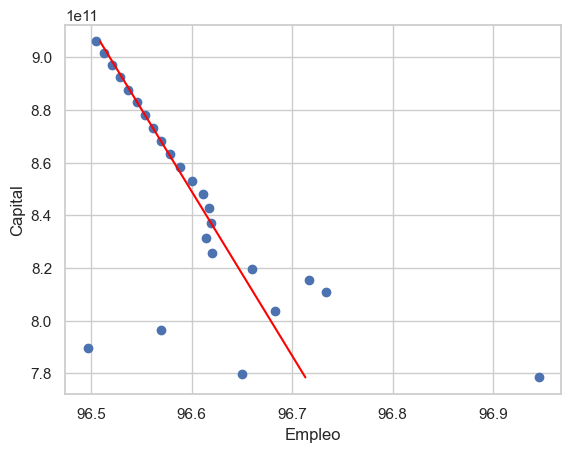

In [95]:

plt.scatter(forecast[:,1], forecast[:,2])
plt.plot(modelo.fittedvalues, forecast[:,2], color = 'red')
plt.xlabel('Empleo')
plt.ylabel('Capital')
plt.show()

En este Grafico de la relacion no podemos ver la magnitud de Credito Bancario dado que esta en valores con un maximo de 8e+1 y los otros 1e+12

In [97]:

# Obtén los residuos
residuals = result.resid

# Realiza una prueba de normalidad de los residuos (por ejemplo, prueba Anderson-Darling)
ad_statistic, critical_values = normal_ad(residuals)

# Compara el estadístico con los valores críticos
for i in range(len(ad_statistic)):
    print(f'Anderson-Darling statistic: {ad_statistic[i]}, Critical value: {critical_values[i]}') # type: ignore

    # Compara el estadístico con el valor crítico
    if ad_statistic[i] > critical_values[i]: # type: ignore
        print(f'Se rechaza la hipótesis nula de normalidad para el estadístico {i + 1}.')
    else:
        print(f'No hay suficiente evidencia para rechazar la hipótesis nula de normalidad para el estadístico {i + 1}.')

Anderson-Darling statistic: 0.8753559104305921, Critical value: 0.022335168302779273
Se rechaza la hipótesis nula de normalidad para el estadístico 1.
Anderson-Darling statistic: 0.30589183121800545, Critical value: 0.5488693925879959
No hay suficiente evidencia para rechazar la hipótesis nula de normalidad para el estadístico 2.
Anderson-Darling statistic: 0.5783734118247708, Critical value: 0.12298159827594435
Se rechaza la hipótesis nula de normalidad para el estadístico 3.


Ahora sobre la normalidad de los residuos en los 3 casos dio que ninguna sigue el patron de datos especificado que en este caso es normal por lo que concluimos que los residuos no siguen una distribucion normal.

## MCO

Usaremos linlog dado que los datos independientes son bastante grandes y me parece el normalizador adecuado para este.

In [98]:
import statsmodels.api as sm

In [100]:
y = data['PIB']
x = data[['empleo','capital']]

model = sm.OLS(y,x).fit(cov_type='HC3')
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    PIB   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              2.605
Date:                Fri, 22 Dec 2023   Prob (F-statistic):                       0.115
Time:                        23:45:35   Log-Likelihood:                         -1095.9
No. Observations:                  40   AIC:                                      2196.
Df Residuals:                      38   BIC:                                      2199.
Df Model:                           2                                                  
Covariance Type:                  HC3                                                  
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

C:\Users\Miguel\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '


Manteniendo Constante el Ahorro Interno Bruto cuando las Reservas crecen en una unidad crea un efecto porcentual 430.95% de este en Y, pero cuando mantengo constante las reservas el Ahorro interno bruto crea una disminucion del 419% del valor, lo que me da a entender que pueden estar inversamente correlacionadas y por lo tanto afectado al modelo por ambos lados

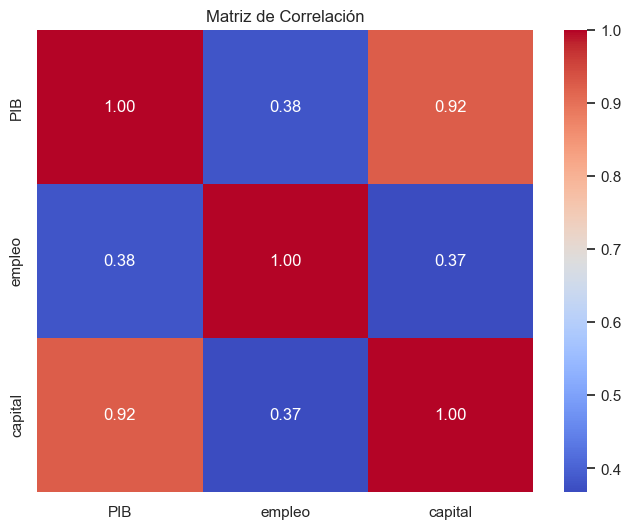

In [101]:

correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


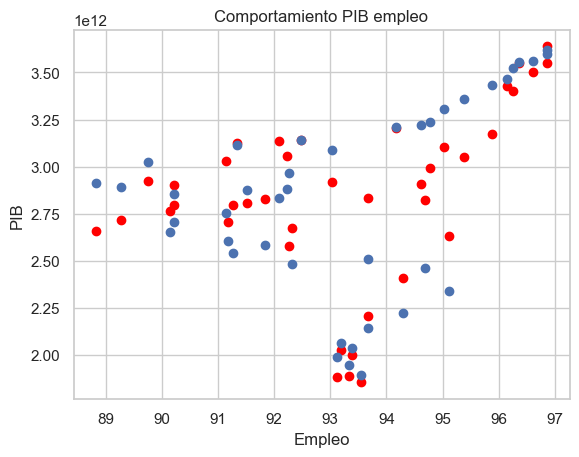

In [105]:
plt.scatter(data['empleo'],model.fittedvalues, label = 'prediccion', color = 'red')
plt.scatter(data['empleo'],data['PIB'], label = 'datos')
plt.title('Comportamiento PIB empleo')
plt.xlabel('Empleo')
plt.ylabel('PIB')
plt.show()

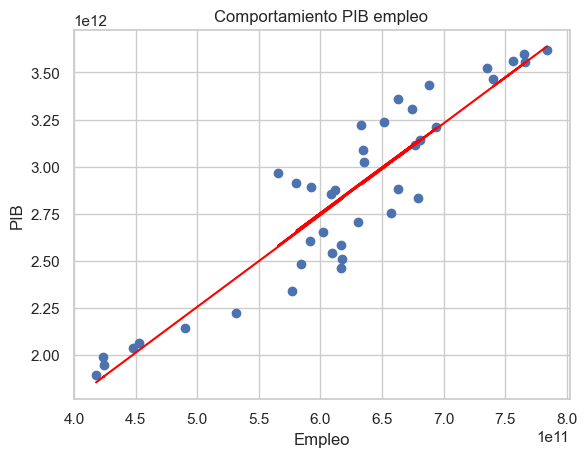

In [107]:
plt.plot(data['capital'],model.fittedvalues, label = 'prediccion', color = 'red')
plt.scatter(data['capital'],data['PIB'], label = 'datos')
plt.title('Comportamiento PIB empleo')
plt.xlabel('Empleo')
plt.ylabel('PIB')
plt.show()

- El analisis es mas congruente en el MCO que en el modelo VEC como podemos apreciar pero los datos no se ajustan a los reales en el MCO por otro lado el VEC tiene modelos mas ajustados.